In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Tweets downloaded from NLTK (See [here](https://www.nltk.org/howto/twitter.html#corpus_reader) for more details).
* Load tweets from json format and retrieve the data we want 
* Apply NLP on the tweets with the use of NLTK library to find out how the words used in positive and negative tweets are different
    * Different tokenisers
    * Different sets of stop words
    * Handling emoticons

## Have a quick look of the data

Have a look of the first line of the file:

In [3]:
with open('positive_tweets.json') as f:
    for line in f:
        print(line)
        break

{"contributors": null, "coordinates": null, "text": "#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)", "user": {"time_zone": "Paris", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/784477066/7a8d261ef8d27f2bdf08fadac65bea7b.jpeg", "geo_enabled": true, "profile_image_url_https": "https://pbs.twimg.com/profile_images/567331322830413825/bqH6u2DO_normal.jpeg", "url": "http://t.co/iY2ZZAJY1Y", "profile_text_color": "000000", "entities": {"url": {"urls": [{"url": "http://t.co/iY2ZZAJY1Y", "indices": [0, 22], "expanded_url": "http://www.international.cci-paris-idf.fr", "display_url": "international.cci-paris-idf.fr"}]}, "description": {"urls": [{"url": "http://t.co/wGg73YM5yh", "indices": [102, 124], "expanded_url": "http://ow.ly/KwxhI", "display_url": "ow.ly/KwxhI"}]}}, "listed_count": 296, "statuses_count": 12858, "profile_sidebar_fill_color": "DDFFCC", "profile_sidebar_border_color": "FFFFFF", 

## Load in the data using json

Load in the data from json to a `list` of `dict` for both `'positive_tweets.json` and `negative_tweets.json`:

In [6]:
import json

pos_tweets = []
with open('positive_tweets.json') as f:
    for line in f:
        pos_tweets.append(json.loads(line))
        
neg_tweets = []
with open('negative_tweets.json') as f:
    for line in f:
        neg_tweets.append(json.loads(line))

## Have a look of some example tweets

Have a look of the text of the positive tweet at index 116 and negative tweet at index 57:

In [13]:
pos_tweets[0]['text']

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [12]:
# write your code here (store the positive tweet in example_pos_tweet and the negative tweet in example_neg_tweet)
example_pos_tweet=pos_tweets[116]['text']
example_pos_tweet

'@Cjlopez21 you know I will 💪 Monica and I miss you to, yeah sounds good to me :)'

In [14]:
example_neg_tweet=neg_tweets[57]['text']
example_neg_tweet

'#ClimateChange #CC Idaho will not restrict fishing despite regional drought-linked die-of... http://t.co/jJboDo6LYZ #UniteBlue #Tcot :-('

## Extract the text from tweets

Store the text of each tweet to two lists, one for positive tweets, another for negative tweets:

In [10]:
#write your code here (hint: loop through pos_tweets and neg_tweets and append it to pos_text and neg_text)

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [16]:
for i in [1,2,3]:
    print(i)

1
2
3


In [82]:
pos_text= []
for tweet in pos_tweets:
    pos_text.append(tweet['text'])

In [83]:
pos_text[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [84]:
neg_text= []
for tweet in neg_tweets:
    neg_text.append(tweet['text'])


In [85]:
neg_text[0]

'hopeless for tmr :('

## Simple data exploration using pandas

We first put all tweets into one `DataFrame`:

In [86]:
import pandas as pd

pos_df = pd.DataFrame(pos_text, columns=['text'])
pos_df['sentiment'] = 'pos'
neg_df = pd.DataFrame(neg_text, columns=['text'])
neg_df['sentiment'] = 'neg'

df = pd.concat([pos_df, neg_df], axis = 0).reset_index(drop=True)
df['sentiment'] = df['sentiment'].astype('category')
df

,text,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,pos
1,@Lamb2ja Hey James! How odd :/ Please call our...,pos
2,@DespiteOfficial we had a listen last night :)...,pos
3,@97sides CONGRATS :),pos
4,yeaaaah yippppy!!! my accnt verified rqst has...,pos
...,...,...
9995,I wanna change my avi but uSanele :(,neg
9996,MY PUPPY BROKE HER FOOT :(,neg
9997,where's all the jaebum baby pictures :((,neg
9998,But but Mr Ahmad Maslan cooks too :( https://t...,neg


## Simple data exploration using pandas (continue)

Some positive tweets (with the use of `sample()`):

In [87]:
print(df.loc[df.sentiment == 'pos', 'text'].sample(5).values)

['So happy rn :D @Vrixol @InFaArmy @InFaMonstah'
 'Hi BAM ! @BarsAndMelody \nCan you follow my bestfriend @969Horan696 ? \nShe loves you a lot :) \nSee you in Warsaw &lt;3 \nLove you &lt;3 x29'
 'Thank you for following us, Betty Miller! A new friend is always welcome! :) http://t.co/0ZM3ZoKkm6'
 '@FranchiSeedsUK beautiful :) got blackfly on my courgette flowers this year .. any ideas? hopefully it wont affect the fruit'
 '@Mufcfighter1 @theR3Ddot13 We would anyway with them in there :-)']


And some negative tweets:

In [88]:
print(df.loc[df.sentiment == 'neg', 'text'].sample(5).values)

["I just can't say nah to food :((((" 'Isco :((((('
 '@DrishyamTheFilm @Team_AjayDevgn @ajaydevgn Not fair with us from Pb.contestants our dreams not comes true this time :('
 "guess who's spent half an hr sitting outside her apt building bc she left her keys at work?\n\nI hope someone needs to leave this bldg soon :("
 "@The5BallOver @Radio702 :-( It's not a challenge though. Please check our FB page for entries and rather do a substitution. Thanks!"]


## Simple data exploration using pandas (continue)

Count the number of words used in tweets (in a naive way):

In [89]:
#create a new column "tweet length" (hint: use df["text"].str.split().str.len())
df["tweet length"]= df["text"].str.split().str.len()
df.head()

,text,sentiment,tweet length
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,pos,15
1,@Lamb2ja Hey James! How odd :/ Please call our...,pos,24
2,@DespiteOfficial we had a listen last night :)...,pos,20
3,@97sides CONGRATS :),pos,3
4,yeaaaah yippppy!!! my accnt verified rqst has...,pos,21


## Simple data exploration using pandas (continue)

Here we want to check whether we have a similar amount of positive and negative tweets:

In [90]:
# import seaborn (sns) and matplotlib.pyplot (plt)

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# use sns.countplot and set x=df["sentiment"]

<Axes: xlabel='sentiment', ylabel='count'>

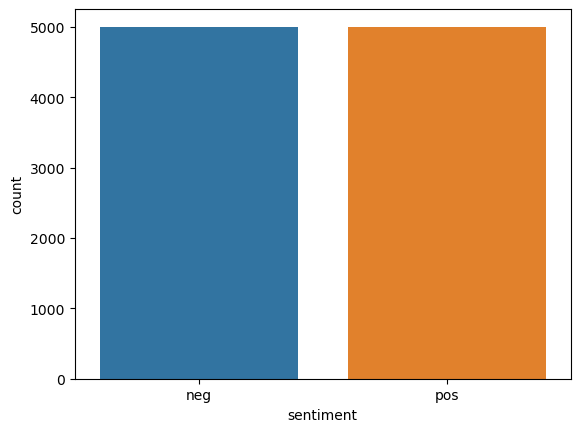

In [93]:
sns.countplot(x=df["sentiment"])

## Simple data exploration using pandas (continue)

See if there is a noticeable difference in terms of the length of tweets (so that we can use it directly to distinguish positive and negative tweets):

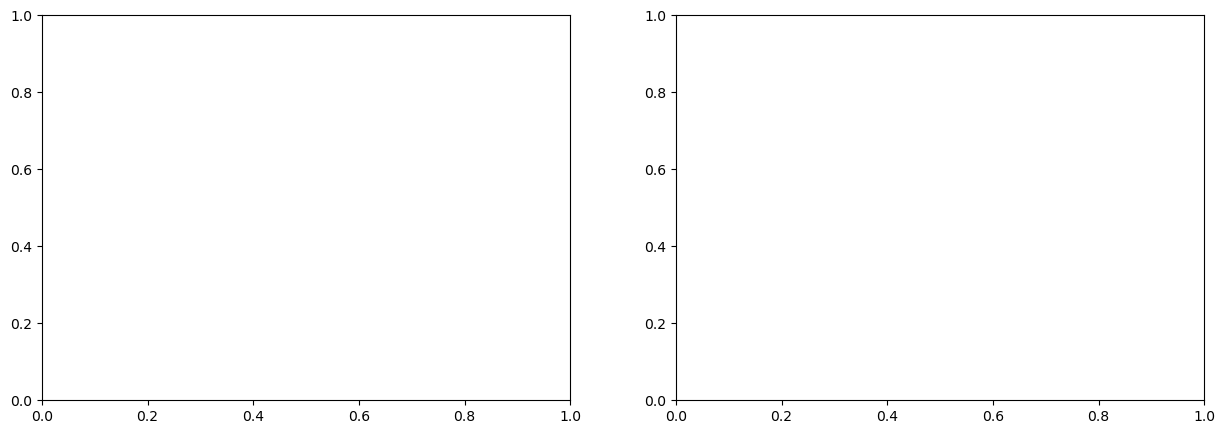

In [94]:
# use fig,ax = plt.subplots() to create two side by side plots with figsize = (15,5)
fig,ax = plt.subplots(1,2, figsize = (15,5))

<Axes: xlabel='sentiment', ylabel='tweet length'>

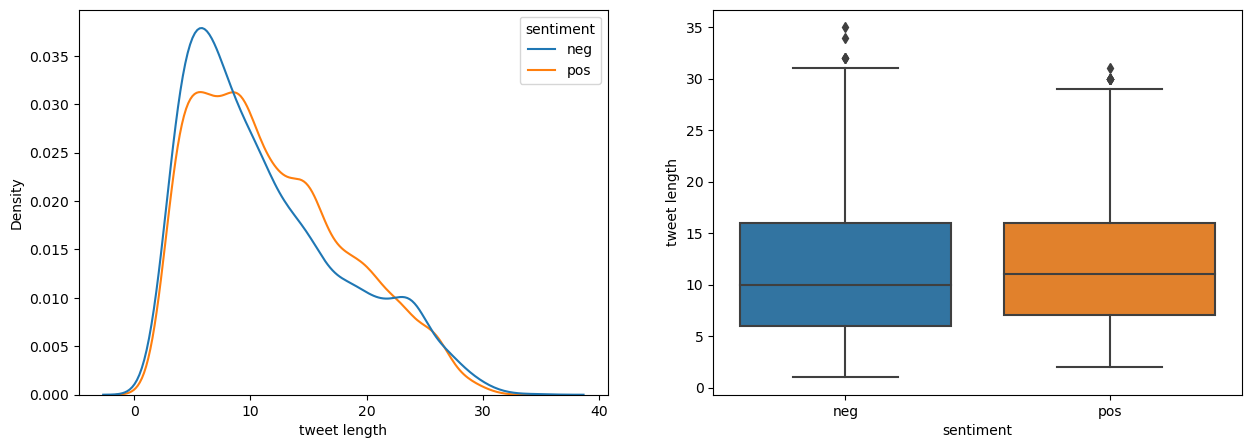

In [95]:
# create the left plot with sns.kdeplot (hint: set x = 'tweet length', hue = 'sentiment', ax = ax[0])
_,ax = plt.subplots(1,2, figsize = (15,5))
sns.kdeplot (data = df, x = 'tweet length', hue = 'sentiment', ax = ax[0])
sns.boxplot (data = df, y = 'tweet length', x = 'sentiment', ax = ax[1])

In [96]:
# create the right plot with sns.boxplot (hint: y = 'tweet length', x = 'sentiment', ax = ax[1])

## Implement NLTK libraries

Code is written differently to make it easier to modify the preprocessing steps later. Note here we do _not_ strip the punctuations - we want to keep the emoticons (at least for now).

In [103]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/dolphinsu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [104]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import collections

nltk_sw = stopwords.words('english')
stemmer = SnowballStemmer('english')

def simple_tokenise(text):
    return word_tokenize(text)

def to_lower(tokens):
    return [one_token.lower() for one_token in tokens]

def remove_nltk_sw(tokens):
    return [one_token for one_token in tokens if one_token not in nltk_sw]

def stem(tokens):
    return [stemmer.stem(one_token) for one_token in tokens]

all_text = pos_text + neg_text # to combine positive and negative tweets
all_cleaned_tokens = []
for text in all_text:
    tokens = simple_tokenise(text)
    tokens = to_lower(tokens)
    tokens = remove_nltk_sw(tokens)
    tokens = stem(tokens)
    all_cleaned_tokens.append(tokens)

## Find the most commen words in all tweets

In [16]:
word_count = collections.Counter()
for cleaned_tokens in all_cleaned_tokens:
    word_count += collections.Counter(cleaned_tokens)

Result:

In [ ]:
# print the 20 most common words using word_count.most_common(count)

Visualise the result:

In [ ]:
# create a dataframe called count_df with pd.DataFrame() and set columns= ['token', 'freq']

In [ ]:
# graph with sns.barplot() and set plt.xticks(rotation = 45)

## Compare  `word_tokenize()` with `TweetTokenizer().tokenize()`

In [ ]:
# print the tokenized list for example_neg_tweet wtih word_tokenize()

In [ ]:
# print the tokenized list for example_neg_tweet wtih TweetTokenizer().tokenize

## Use  `TweetTokenizer` 

Process the data again and count the tokens, but this time we use `TweetTokenizer` for tokenisation:

In [21]:
def tweet_tokenise(text):
    return TweetTokenizer().tokenize(text)

all_cleaned_tokens = []
for text in all_text:
    tokens = tweet_tokenise(text)
    tokens = to_lower(tokens)
    tokens = remove_nltk_sw(tokens)
    tokens = stem(tokens)
    all_cleaned_tokens.append(tokens)

Try it on an example tweet:

In [22]:
print(example_pos_tweet)
print(all_cleaned_tokens[example_pos_idx])

@Cjlopez21 you know I will 💪 Monica and I miss you to, yeah sounds good to me :)
['@cjlopez21', 'know', '💪', 'monica', 'miss', ',', 'yeah', 'sound', 'good', ':)']


## Use  `TweetTokenizer`  (continue)

Result:

In [23]:
word_count = collections.Counter()
for cleaned_tokens in all_cleaned_tokens:
    word_count += collections.Counter(cleaned_tokens)
    
print(word_count.most_common(15))

[(':(', 4586), (':)', 3693), ('!', 2675), ('.', 2433), (',', 1698), ('(', 1262), ('?', 1225), ('thank', 751), ('follow', 706), (':-)', 701), (':d', 658), ('...', 622), (')', 584), ('love', 549), ("i'm", 526)]


Now we get a much better result - For example, now emoticons are intact.

## Find the most occurring words for positive and negative tweets

Convert the code to tokenise and clean each tweet to a function for easy reuse later:

In [24]:
def get_cleaned_tokens_v0(text):
    tokens = tweet_tokenise(text)
    tokens = to_lower(tokens)
    tokens = remove_nltk_sw(tokens)
    tokens = stem(tokens)
    return tokens

Example use:

In [25]:
example_pos_tokens = get_cleaned_tokens_v0(example_pos_tweet)
example_neg_tokens = get_cleaned_tokens_v0(example_neg_tweet)
print(example_pos_tokens)
print(example_neg_tokens)

['@cjlopez21', 'know', '💪', 'monica', 'miss', ',', 'yeah', 'sound', 'good', ':)']
['#climatechang', '#cc', 'idaho', 'restrict', 'fish', 'despit', 'region', 'drought-link', 'die-of', '...', 'http://t.co/jjbodo6lyz', '#uniteblu', '#tcot', ':-(']


In [ ]:
# create example_pos_tokens by applying get_cleaned_tokens_v0 on example_pos_tweet and print it out

In [ ]:
# create example_neg_tokens by applying get_cleaned_tokens_v0 on example_neg_tweet and print it out

## Find the most occurring words for positive and negative  (continue)

Convert the code to count the appearances of each token into a function for easy reuse later:

In [26]:
def get_count(list_of_tokens):
    word_count = collections.Counter()
    for tokens in list_of_tokens:
        word_count += collections.Counter(tokens)
    return word_count

Example use:

In [27]:
example_list_of_tokens = [example_pos_tokens, example_neg_tokens]
print(get_count(example_list_of_tokens))

Counter({'@cjlopez21': 1, 'know': 1, '💪': 1, 'monica': 1, 'miss': 1, ',': 1, 'yeah': 1, 'sound': 1, 'good': 1, ':)': 1, '#climatechang': 1, '#cc': 1, 'idaho': 1, 'restrict': 1, 'fish': 1, 'despit': 1, 'region': 1, 'drought-link': 1, 'die-of': 1, '...': 1, 'http://t.co/jjbodo6lyz': 1, '#uniteblu': 1, '#tcot': 1, ':-(': 1})


## Find the most occurring words for positive and negative  (continue)

Result:

In [29]:
pos_tokens = [get_cleaned_tokens_v0(text) for text in pos_text]
print(get_count(pos_tokens).most_common(20))

[(':)', 3691), ('!', 1844), ('.', 1341), (',', 964), (':-)', 701), (':d', 658), ('thank', 644), ('?', 581), (')', 525), ('follow', 443), ('love', 398), ('...', 290), ('"', 264), (':', 249), ('day', 245), ('u', 245), ('good', 238), ('like', 232), ('-', 213), ('get', 209)]


In [30]:
neg_tokens = [get_cleaned_tokens_v0(text) for text in neg_text]
print(get_count(neg_tokens).most_common(20))

[(':(', 4585), ('(', 1180), ('.', 1092), ('!', 831), (',', 734), ('?', 644), (':-(', 501), ("i'm", 343), ('...', 332), ('miss', 301), ('pleas', 275), ('follow', 263), ('want', 246), ('get', 233), ('go', 224), ('like', 223), ('"', 215), (':', 211), ('♛', 210), ('》', 210)]


There are nearly 4600 `:(` out of 5000 tweets! Are you surprised by the result? 

## Note on the data

If you read the `README.txt` file in the data folder, you can find out that the "positive" tweets were collected by searching against the following set of emoticons:

In [31]:
pos_emoticon = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
'=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

And the "negative" tweets were collected by searching against the following set of emoticons:

In [32]:
neg_emoticon = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
':c', ':{', '>:\\', ';('])

Therefore, due to how the data is collected, emoticons `:(` and `:)` appear a lot in the data. Using them directly we will be able to identify whether a given tweet is positive in the set of data. But this result will not generalise well to the real world data. 

Follow up question: Do you think the positive tweets are really "positive", and negative ones are really "negative"?

## Improvement 1: remove punctuations and emoticons

Here we remove emoticons as we want to discover other insights from the text, rather than the "self-fulfilling" high number of appearance of emoticons. For simplicity we remove _all_ punctuations, although punctuations like `!` can be useful:

In [33]:
import string

all_emoticon = pos_emoticon.union(neg_emoticon)

def remove_emoticon(tokens):
    return [one_token for one_token in tokens if one_token not in all_emoticon]

def remove_punctuation(tokens):
    # remove right most punctations (as we do not want to remove the punctuations from #xxx @yyy)
    return [one_token.rstrip(string.punctuation) for one_token in tokens if 
            len(one_token.rstrip(string.punctuation))]

def get_cleaned_tokens_v1(text):
    # remove emoticon and punction
    # note the order of the pre-processing tasks is important
    tokens = tweet_tokenise(text)
    tokens = remove_emoticon(tokens)
    tokens = remove_punctuation(tokens)
    tokens = to_lower(tokens)
    tokens = remove_nltk_sw(tokens)
    tokens = stem(tokens)
    return tokens

## Note on order of pre-processing tasks

Order of pre-processing tasks is important. 
* Consider you have some emoticons like `:D` and `:o)`, some stop words like `To` in the text.
    * If you perform `to_lower()` -> `remove_emoticon()`, you will turn `:D` to `:d` before trying to remove the emoticon
    * If you perform `remove_punctuation()` -> `remove_emoticon()`, you will turn `:o)` to `:o` before trying to remove the emoticon
    * If you perform `remove_nltk_sw()` -> `to_lower()`, you will not able to remove the stop word `To` as only `to` is in the list of stopwords

## Improvement 1: remove punctuations and emoticons (continue)
Exmple use:

In [68]:
print(get_cleaned_tokens_v1(example_pos_tweet))
print(get_cleaned_tokens_v1(example_neg_tweet))

['@cjlopez21', 'know', '💪', 'monica', 'miss', 'yeah', 'sound', 'good']
['#climatechang', '#cc', 'idaho', 'restrict', 'fish', 'despit', 'region', 'drought-link', 'die-of', 'http://t.co/jjbodo6lyz', '#uniteblu', '#tcot']


Result:

In [ ]:
# create a list called pos_tokens by looping through pos_text and appending get_cleaned_tokens_v1(text)

In [ ]:
# print the 20 most common tokens with get_count().most_common(20)

In [ ]:
# create a list called neg_tokens by looping through neg_text and appending get_cleaned_tokens_v1(text)

In [ ]:
# print the 20 most common tokens with get_count().most_common(20)

No more emoticons and standalone punctuations in the result.

## Improvement 2: customise stop words

Have a look of the stop words provided by NLTK:

In [37]:
print(nltk_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

For topic finding, words like "not", "no", "don't" may not be useful and we may want to filter them out. For what we are doing here, however, those "negative stop words" can be useful.

## Improvement 2: customise stop words (continue)

Here we create a new set of stop words by only keeping the non-negative stop words from the list of stops words from NLTK, and also adding 2 more stop words:

In [38]:
neg_sw = set(['against', 'below', 'no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
          'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
          "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
          "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 't'])
my_sw = set(nltk_sw) - neg_sw
my_sw.add('u')
my_sw.add("i'm")
print(my_sw)

{'how', 'under', 'it', 'these', "it's", 'your', 'which', 'on', 'their', 'while', 'for', 'whom', 'you', 'some', 'been', 'any', 'what', "she's", 'he', 'over', 'off', 'as', 'myself', 'with', 'yourself', 'those', 'but', 'where', 'this', 'or', 'in', 'ours', 'y', 'more', 'be', 'out', 'she', 'her', 'a', 'then', 'own', 'very', 'yours', 'into', 'further', 'hers', 'themselves', 'when', 'was', 'because', "should've", "i'm", 's', 'yourselves', 'who', 'that', 'should', 'o', 'during', 'too', 'at', 'theirs', 'by', 'before', 'has', 'again', 'ourselves', 'them', 'they', 'the', 'both', 'each', 'here', 'down', 'are', 'only', 'being', 'll', 'have', 'after', 've', 'above', 'himself', 'from', 'our', 'if', 'had', 'herself', "that'll", 'through', 'm', 'there', 'once', 'd', 'most', 'me', 'about', 'do', 'other', 'having', 'why', 'him', 'than', 'few', 'all', 'so', 'up', 'am', 'were', 'same', 'will', 'just', 'i', 'can', 'did', 'doing', 'such', "you've", 'his', 'of', "you'll", 'and', 'now', 'until', 're', 'itself'

## Improvement 2: customise stopwords (continue)

In [39]:
def remove_my_sw(tokens):
    return [one_token for one_token in tokens if one_token not in my_sw]
    
def get_cleaned_tokens_v2(text):
    # now we use our own set of stopwords
    tokens = tweet_tokenise(text)
    tokens = remove_emoticon(tokens) 
    tokens = remove_punctuation(tokens)
    tokens = to_lower(tokens)
    tokens = remove_my_sw(tokens)
    tokens = stem(tokens)
    return tokens

Example use:

In [ ]:
# print the cleaned tokens for example_pos_tweet and example_neg_tweet with get_cleaned_tokens_v2 

"not" is now kept for the second example.

Result:

In [41]:
pos_tokens = [get_cleaned_tokens_v2(text) for text in pos_text]
print(get_count(pos_tokens).most_common(20))

[('thank', 644), ('follow', 443), ('love', 398), ('day', 245), ('good', 238), ('like', 232), ('get', 209), ('happi', 206), ('see', 186), ('great', 173), ('hi', 173), ('no', 167), ('back', 163), ('know', 155), ('go', 151), ('new', 146), ('hope', 143), ('not', 142), ('look', 140), ('one', 131)]


In [42]:
neg_tokens = [get_cleaned_tokens_v2(text) for text in neg_text]
print(get_count(neg_tokens).most_common(20))

[('miss', 301), ('not', 300), ('no', 284), ('pleas', 275), ('follow', 263), ('want', 246), ('get', 233), ('go', 224), ('like', 223), ('♛', 210), ('》', 210), ("can't", 180), ("don't", 176), ('time', 166), ('feel', 158), ('love', 151), ('day', 150), ('one', 150), ('sorri', 149), ('much', 139)]


Note:
* Now the "negative" stop words `no`, `not`, `don't` are kept, and they appear more frequently in negative tweets than the positive ones
* Why there are a lot of `♛` and `》`?

## Quick investigation on '♛' and '》'

Have a look of the tweets with those symbols:

In [43]:
for text in neg_text:
    if '♛' in text or '》' in text:
        print(text)

♛♛♛
》》》》 
I LOVE YOU SO MUCH.
I BELİEVE THAT HE WİLL FOLLOW.
PLEASE FOLLOW ME PLEASE JUSTİN @justinbieber :( x15.350
》》》》ＳＥＥ ＭＥ
♛♛♛


Spam tweets? You may want to remove them by considering interactions like number of comments, likes and share. 
* In this example, some words like "please" and "follow" seems to associate with spam tweets as well

(Unfortunately, when collecting data, it is common you will have (a fairly large amount of) spam tweets.)

## Results from the tweet exploration

* Words that often associated with positive sentiments like `thanks`, `love`, `good`, `happi` (happy?), `great` and `hope` are more likely to be seen in the "positive" tweets
* Words that are often associated with negative sentiments like `miss`, `not`, `no`, `can't`, `don't` and `sorri` (sorry?) are more likely to be seen in the "negative" tweets
* The unusual large number of appearances of characters like `♛` and `》` leads us to discover some spam tweets in the dataset

## What we have learned from this simple tweet exploration?

Related to text analysis:
* Which pre-processing tasks to do depends on the types of data we have. For example:
    * For tweets, considering punctuations as separate tokens is not ideal due to the frequent use of `#xxx`, `@yyy`, urls, emoticons
    * When comparing different sentiments, keeping "negative" "stop words" can be useful
* Order of pre-processing tasks are important
* Simple text exploration allows us to get some insights from the data and can be useful to help us to find out issues with the quality of data
    * Spam tweets in this case

## What we have learned from this simple tweet exploration? (continue)

* Reading meta data before analysing data is important
    * It provides you important details about the data
    * It saves you time to "rediscover" things already mentioned in the meta data
        * e.g. "discovering" sad face is frquently used in "negative" tweets
    * It prevents you to misunderstood and misinterpret what data 
        * e.g. "negative tweets" here are tweets with negative emoticons, NOT necessarily tweets with negative sentiment
* When collecting tweets (or other social media posts), it is likely you will have some spam posts that you may need to filter them out to have some useful results

## Further cleaning

Depending on what you want to achieve, (e.g. if you want to feed the processed text to some models) you may want to remove @xxxx and url as well:

In [44]:
def remove_start_with(tokens, prefix):
    return [one_token for one_token in tokens if not one_token.startswith(prefix)]
    
def get_cleaned_tokens_v3(text):
    tokens = tweet_tokenise(text)
    tokens = remove_start_with(tokens, '@')
    tokens = remove_start_with(tokens, 'http')
    tokens = remove_emoticon(tokens)
    tokens = remove_punctuation(tokens)
    tokens = to_lower(tokens)
    tokens = remove_my_sw(tokens)
    tokens = stem(tokens)
    return tokens

Example use:

In [45]:
pos_tokens = [get_cleaned_tokens_v3(text) for text in pos_text]
neg_tokens = [get_cleaned_tokens_v3(text) for text in neg_text]
print(pos_tokens[example_pos_idx])
print(neg_tokens[example_neg_idx])

['know', '💪', 'monica', 'miss', 'yeah', 'sound', 'good']
['#climatechang', '#cc', 'idaho', 'not', 'restrict', 'fish', 'despit', 'region', 'drought-link', 'die-of', '#uniteblu', '#tcot']


Notice now @xxx and some url like http://.... are removed.

## Further cleaning (continue)

Result:

In [46]:
print(get_count(pos_tokens).most_common(20))

[('thank', 644), ('follow', 443), ('love', 398), ('day', 245), ('good', 238), ('like', 232), ('get', 209), ('happi', 206), ('see', 186), ('great', 173), ('hi', 173), ('no', 167), ('back', 163), ('know', 155), ('go', 151), ('new', 146), ('hope', 143), ('not', 142), ('look', 140), ('one', 131)]


In [47]:
print(get_count(neg_tokens).most_common(20))

[('miss', 301), ('not', 300), ('no', 284), ('pleas', 275), ('follow', 263), ('want', 246), ('get', 233), ('go', 224), ('like', 223), ('♛', 210), ('》', 210), ("can't", 180), ("don't", 176), ('time', 166), ('feel', 158), ('love', 151), ('day', 150), ('one', 150), ('sorri', 149), ('much', 139)]


# Text cleaning in Pandas

## Digression: `apply()`

`apply()` allows you to apply a function on the rows or columns of a `DataFrame` (or a `Series`) without the use of loop. Example:

In [48]:
marks = pd.DataFrame({'name': ['Harry', 'Hermione', 'Ron', 'Ginny'], 
                      'ps 1': [78, 92, 64, 68], 'ps 2': [56, 88, 80, 87],
                      'ps 3': [71, 90, 49, 59]})
marks

,name,ps 1,ps 2,ps 3
0,Harry,78,56,71
1,Hermione,92,88,90
2,Ron,64,80,49
3,Ginny,68,87,59


In [50]:
def my_range(x):
    return max(x) - min(x)

marks[['ps 1', 'ps 2', 'ps 3']].apply(my_range, axis = 0)

ps 1    28
ps 2    32
ps 3    41
dtype: int64

In [51]:
marks[['ps 1', 'ps 2', 'ps 3']].apply(lambda x: x.max() - x.min(), axis = 1)

0    22
1     4
2    31
3    28
dtype: int64

## Clean the text in pandas

We can use apply each of the pre-processing tasks on the text stored in the `pd.DataFrame` with a sequence of `apply()`:

In [52]:
df['text'].apply(tweet_tokenise).apply(remove_emoticon).\
    apply(remove_punctuation).apply(to_lower).apply(remove_my_sw).apply(stem)

0       [#followfriday, @france_int, @pkuchly57, @mili...
1       [@lamb2ja, hey, jame, odd, pleas, call, contac...
2       [@despiteoffici, listen, last, night, bleed, a...
3                                      [@97side, congrat]
4       [yeaaaah, yippppi, accnt, verifi, rqst, succee...
                              ...                        
9995                          [wanna, chang, avi, usanel]
9996                                 [puppi, broke, foot]
9997                        [where, jaebum, babi, pictur]
9998    [mr, ahmad, maslan, cook, https://t.co/arcid31...
9999      [@eawoman, hull, support, expect, misser, week]
Name: text, Length: 10000, dtype: object

From the code, you can see the order of pre-processing tasks easily: `tweet_tokenise()` -> `remove_emoticon()` -> `remove_punctuation()` -> `to_lower()` -> `remove_my_sw()` -> `stem()`

## Clean the text in pandas (continue)

Alternatively, we can apply the whole pre-processing through the function `get_cleaned_tokens_v3()` (note for v3 we remove @xxx and url as well):

In [53]:
df['cleaned text'] = df['text'].apply(get_cleaned_tokens_v3).str.join(' ')
df

,text,sentiment,tweet length,cleaned text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,pos,15,#followfriday top engag member communiti week
1,@Lamb2ja Hey James! How odd :/ Please call our...,pos,24,hey jame odd pleas call contact centr 02392441...
2,@DespiteOfficial we had a listen last night :)...,pos,20,listen last night bleed amaz track scotland
3,@97sides CONGRATS :),pos,3,congrat
4,yeaaaah yippppy!!! my accnt verified rqst has...,pos,21,yeaaaah yippppi accnt verifi rqst succeed got ...
...,...,...,...,...
9995,I wanna change my avi but uSanele :(,neg,8,wanna chang avi usanel
9996,MY PUPPY BROKE HER FOOT :(,neg,6,puppi broke foot
9997,where's all the jaebum baby pictures :((,neg,7,where jaebum babi pictur
9998,But but Mr Ahmad Maslan cooks too :( https://t...,neg,9,mr ahmad maslan cook


## Clean the text in pandas (continue)

Advantages of this approach:
* You can keep all your data in a `DataFrame`, instead of having some data stored in some lists
* As your data is in `DataFrame`, you can leverage the functionality provided by `pandas`
    * e.g. plotting, filtering
* Code can be easier to read and easier to modify
    * Order of the tasks very clear
    
(However, counting the number of appearances of each word is trickier when the strings are stored in `DataFrame`)

# Build a model to predict category (demo only)

## Objectives

* Show NLP (naive and generic) pre-processing does not necessarily improve the performance of models
* Show how we can process and extract meaning from emoticons
* Show you can build a "very good performing" model if you ignore how the data was collected

You do NOT need to know how to write the code in this session - the code here is for illustrative purpose only.

## Create "benchmark" 

Here we create the "naive text", for which no pre-processing is done on the tweets except removing the emoticons:

In [70]:
df['naive text'] = df['text'].apply(tweet_tokenise).apply(remove_emoticon).str.join(' ')
df

,text,sentiment,tweet length,cleaned text,naive text,emoticon text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,pos,15,#followfriday top engag member communiti week,#FollowFriday @France_Inte @PKuchly57 @Milipol...,#followfriday top engag member communiti week ...
1,@Lamb2ja Hey James! How odd :/ Please call our...,pos,24,hey jame odd pleas call contact centr 02392441...,@Lamb2ja Hey James ! How odd :/ Please call ou...,"hey jame odd skeptical, annoyed, undecided, un..."
2,@DespiteOfficial we had a listen last night :)...,pos,20,listen last night bleed amaz track scotland,@DespiteOfficial we had a listen last night As...,listen last night happy face or smiley bleed a...
3,@97sides CONGRATS :),pos,3,congrat,@97sides CONGRATS,congrat happy face or smiley
4,yeaaaah yippppy!!! my accnt verified rqst has...,pos,21,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy ! ! ! my accnt verified rqst h...,yeaaaah yippppi accnt verifi rqst succeed got ...
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,neg,8,wanna chang avi usanel,I wanna change my avi but uSanele,"wanna chang avi usanel frown, sad, andry or pout"
9996,MY PUPPY BROKE HER FOOT :(,neg,6,puppi broke foot,MY PUPPY BROKE HER FOOT,"puppi broke foot frown, sad, andry or pout"
9997,where's all the jaebum baby pictures :((,neg,7,where jaebum babi pictur,where's all the jaebum baby pictures (,"where jaebum babi pictur frown, sad, andry or ..."
9998,But but Mr Ahmad Maslan cooks too :( https://t...,neg,9,mr ahmad maslan cook,But but Mr Ahmad Maslan cooks too https://t.co...,"mr ahmad maslan cook frown, sad, andry or pout"


## Convert text to a matrix of TF-IDF features (demo only)

In [55]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
naive_text_tf = TfidfVectorizer().fit_transform(df["naive text"])
cleaned_text_tf = TfidfVectorizer().fit_transform(df["cleaned text"])

In [57]:
naive_text_tf

<10000x20788 sparse matrix of type '<class 'numpy.float64'>'
	with 97915 stored elements in Compressed Sparse Row format>

In [58]:
cleaned_text_tf

<10000x10051 sparse matrix of type '<class 'numpy.float64'>'
	with 53761 stored elements in Compressed Sparse Row format>

Why sparse matrix? We will talk about it in week 9. Stay tuned!

## Train the model: without NLP preprocessing

In [59]:
# you do not need to understand the code here
naive_X_train, naive_X_test, naive_y_train, naive_y_test = train_test_split(
    naive_text_tf, df["sentiment"], test_size=0.3, random_state=1
)

clf = MultinomialNB().fit(naive_X_train, naive_y_train)
predicted = clf.predict(naive_X_test)

print("Accuracy:", metrics.accuracy_score(naive_y_test, predicted))

Accuracy: 0.774


This shows that using the text _without_ pre-processing, 77.4% of the time the model classifies the category (positive / negative) correctly with the given "test" data.

## Train the model: with NLP preprocessing

In [60]:
# you do not need to understand the code here
cleaned_X_train, cleaned_X_test, cleaned_y_train, cleaned_y_test = train_test_split(
    cleaned_text_tf, df["sentiment"], test_size=0.3, random_state=1
)

clf = MultinomialNB().fit(cleaned_X_train, cleaned_y_train)
predicted = clf.predict(cleaned_X_test)

print("Accuracy:", metrics.accuracy_score(cleaned_y_test, predicted))

Accuracy: 0.75


This shows that using the text _with_ processing, 75% of the time the model classifies the category (positive / negative) correctly with the given "test" data. 
* No evidence that NLP pre-processing improves the result of the model for this example

## Pre-processing or not?

* For exploration purpose, we have seen pre-processing is useful - consider what you have done in PS2. Without removing the stop words, you are not able to get a useful result
* When modeling data, how to pre-process the data depending on what model you are using. For example, some models take care of stop words automatically, so it may be better not to remove them directly by yourself
    * For example, when classifying the category of text, some models automatically give low weights to words appear frequently in different categories (which includes the stop words), and provide high weights to words that appear frequently only in a specific category

## Extracting meaning from emoticons

In [63]:
# note previously I used EMOTICONS instead of EMOTICONS_EMO
# it is because I was using emot in version 2 - they have decided to use another name 
# for the same thing in the new version 3...
from emot.emo_unicode import EMOTICONS_EMO # you may need to install emot

my_emot = {emot.replace('\\', ''): txt for emot, txt in EMOTICONS_EMO.items()}

def convert_emoticon(tokens):
    # convert emoticon to text
    func = lambda token: my_emot[token] if token in my_emot else token
    return [func(token) for token in tokens]

Example use:

In [64]:
convert_emoticon([':)', ':-)', ':('])

['Happy face or smiley', 'Happy face smiley', 'Frown, sad, andry or pouting']

By turning the emoticons into text, it helps us to "group" similar emoticons together.

## Extracting meaning from emoticons (continue)

In [66]:
def get_cleaned_tokens_v4(text):
    # now emoticons are converted to text
    tokens = tweet_tokenise(text)
    tokens = remove_start_with(tokens, '@')
    tokens = remove_start_with(tokens, 'http')
    tokens = convert_emoticon(tokens) 
    tokens = remove_punctuation(tokens)
    tokens = to_lower(tokens)
    tokens = remove_my_sw(tokens)
    tokens = stem(tokens)
    return tokens

## Extracting meaning from emoticon (continue)

In [67]:
df['emoticon text'] = df['text'].apply(get_cleaned_tokens_v4).str.join(' ')
df

,text,sentiment,tweet length,cleaned text,naive text,emoticon text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,pos,15,#followfriday top engag member communiti week,#FollowFriday @France_Inte @PKuchly57 @Milipol...,#followfriday top engag member communiti week ...
1,@Lamb2ja Hey James! How odd :/ Please call our...,pos,24,hey jame odd pleas call contact centr 02392441...,@Lamb2ja Hey James ! How odd :/ Please call ou...,"hey jame odd skeptical, annoyed, undecided, un..."
2,@DespiteOfficial we had a listen last night :)...,pos,20,listen last night bleed amaz track scotland,@DespiteOfficial we had a listen last night As...,listen last night happy face or smiley bleed a...
3,@97sides CONGRATS :),pos,3,congrat,@97sides CONGRATS,congrat happy face or smiley
4,yeaaaah yippppy!!! my accnt verified rqst has...,pos,21,yeaaaah yippppi accnt verifi rqst succeed got ...,yeaaaah yippppy ! ! ! my accnt verified rqst h...,yeaaaah yippppi accnt verifi rqst succeed got ...
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,neg,8,wanna chang avi usanel,I wanna change my avi but uSanele,"wanna chang avi usanel frown, sad, andry or pout"
9996,MY PUPPY BROKE HER FOOT :(,neg,6,puppi broke foot,MY PUPPY BROKE HER FOOT,"puppi broke foot frown, sad, andry or pout"
9997,where's all the jaebum baby pictures :((,neg,7,where jaebum babi pictur,where's all the jaebum baby pictures (,"where jaebum babi pictur frown, sad, andry or ..."
9998,But but Mr Ahmad Maslan cooks too :( https://t...,neg,9,mr ahmad maslan cook,But but Mr Ahmad Maslan cooks too https://t.co...,"mr ahmad maslan cook frown, sad, andry or pout"


## Modeling with meaning of emoticons extracted

In [71]:
# base case
text_tf = TfidfVectorizer().fit_transform(df["text"])

text_X_train, text_X_test, text_y_train, text_y_test = train_test_split(
    text_tf, df["sentiment"], test_size=0.3, random_state=1
)

clf = MultinomialNB().fit(text_X_train, text_y_train)
predicted = clf.predict(text_X_test)

print("Accuracy:", metrics.accuracy_score(text_y_test, predicted))

Accuracy: 0.7746666666666666


In [72]:
# with pre-processing
emoticon_text_tf = TfidfVectorizer().fit_transform(df["emoticon text"])

emoticon_X_train, emoticon_X_test, emoticon_y_train, emoticon_y_test = train_test_split(
    emoticon_text_tf, df["sentiment"], test_size=0.3, random_state=1
)

clf = MultinomialNB().fit(emoticon_X_train, emoticon_y_train)
predicted = clf.predict(emoticon_X_test)

print("Accuracy:", metrics.accuracy_score(emoticon_y_test, predicted))

Accuracy: 0.99


Now we have a model with very high accuracy - we are 99% correct. Shame this only "works" because of how the data was collected.

## Summary

* Manipulate tweets in json format
* NLP application
    * Explore different tokenisers
    * Consider the list of stop words to use
    * Convert emoticons to text

# Appendix

## List comprehension
List comprehension offers a way to create a new list when each element is the result of some operations on the element of another sequence.
* For example, if we want to create a list to store the marks of each students with the marks adjusted by 3 points, we could:

In [ ]:
ps_1 = [75, 92, 64]
new_marks = []
for mark in ps_1:
    new_marks.append(mark+3)
new_marks

But we can rewrite it using list comprehension:

In [ ]:
[mark + 3 for mark in ps_1]

## Lambda function

* Lambda function (or anonymous function) is a way of writing functions consisting of a single statement
* Syntax: `lambda x: return_value`
* For example, the function `mean()`:

In [ ]:
def my_range(x):
    return max(x) - min(x)

Can be rewritten using lambda function:

In [ ]:
my_range = lambda x: max(x) - min(x)
type(my_range)

## Use a lambda function

It is just a normal function:

In [ ]:
x = [1, 2, 3, 4, 5]
my_range(x)